# PREDICTION OF SEPSIS

###### Aysha Afreen Althaf


## Introduction

Sepsis remains a formidable challenge in healthcare, posing significant risks to patients and demanding swift and accurate clinical intervention. Defined as the body's extreme response to an infection, sepsis can rapidly progress to septic shock, causing critical organ dysfunction and even mortality if not promptly addressed. Despite advancements in medical care, sepsis continues to drive substantial morbidity and mortality rates worldwide. In fact, a 2017 study showed that sepsis accounted for nearly 20% of global deaths and was one of the leading causes of mortality in clinical settings.

Given its urgency and severity, early detection and intervention are essential in managing sepsis. However, identifying patients at risk of developing sepsis remains a complex and complex task for healthcare providers. While certain clinical factors, such as immunocompromised status or the presence of invasive medical procedures, heightens susceptibility to sepsis, accurately predicting its onset before clinical deterioration poses significant challenges. Consequently, there exists a pressing need for robust predictive models that can leverage clinical data to forecast the likelihood of sepsis onset, enabling timely interventions and improving patient outcomes.

In response to this need, our machine learning project is to develop and validate predictive algorithms for sepsis detection. Leveraging vital signs, demographics information, and various biomarkers, our model aims to predict sepsis up to 6 hours prior to when sepsis symptoms manifest. Through rigorous model development and validation, we seek to contribute to the ongoing efforts to enhance early sepsis detection and ultimately improve patient care and outcomes in clinical settings.


## Dataset

The data we are working with comes from Kaggle, sourced from the MIMIC database which contains records of patients in intensive care. It data spanned approximately 1.5 million rows, containing the data of 60,000 ICU patients with 44 different features.

The way the data is formatted has the dependent variable, caled SepsisLabel, labelled as a 1 if the data is taken 6 hours or less before signs of sepsis, and 0 if the data row is greater than 6 hours away from a sepsis event. Signs of sepsis includes either clinical suspicion of sepsis from a doctor, or signs of organ deterioration. Therefore, we are trying to predict up to 6 hours before it is usually diagnosed, which could be lifesaving.

In [ ]:
# Reading the Dataset
import pandas as pd
df = pd.read_csv("Dataset.csv")
df

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,22,0,113911
1552206,22,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,23,0,113911
1552207,23,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,24,0,113911
1552208,24,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,...,NaN,NaN,88.00,0,1.0,0.0,-2.93,25,0,113911


In [ ]:
# checking for null values
df.isna().sum()

Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           

<ipython-input-6-475bf6474222>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_proportions.values, y=null_proportions.index, palette="viridis")


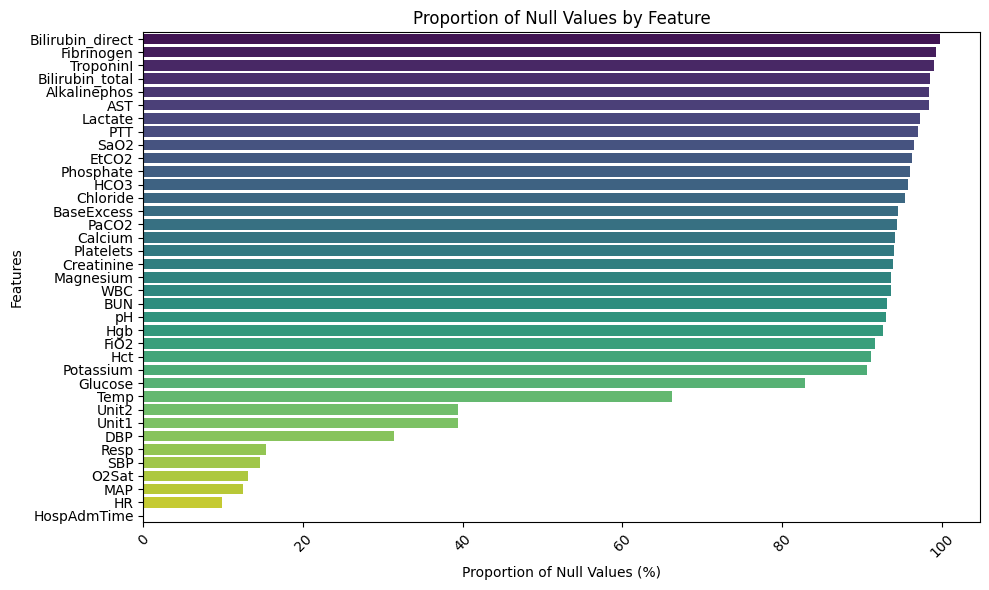

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
null_proportions = (df.isnull().mean() * 100).sort_values(ascending=False)
null_proportions = null_proportions[null_proportions > 0]  # Filter out features with no null values

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=null_proportions.values, y=null_proportions.index, palette="viridis")

plt.title('Proportion of Null Values by Feature')
plt.xlabel('Proportion of Null Values (%)')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis reveals a significant prevalence of null values across many features in our dataset, with only a select few variables demonstrating a substantial amount of available data. Notably, some predictors exhibit an overwhelming proportion of missing values, exceeding 99% in certain cases. This presents a notable challenge as it compromises the completeness and reliability of our data for subsequent analysis and model development.

To address this issue, our next step involves rigorous data cleaning to handle missing values effectively.

In [ ]:
#checking for duplicates
duplicates = df[df.duplicated(keep=False)]
print('Duplicate values in the Dataset=', duplicates)

Duplicate values in the Dataset= Empty DataFrame
Columns: [Unnamed: 0, Hour, HR, O2Sat, Temp, SBP, MAP, DBP, Resp, EtCO2, BaseExcess, HCO3, FiO2, pH, PaCO2, SaO2, AST, BUN, Alkalinephos, Calcium, Chloride, Creatinine, Bilirubin_direct, Glucose, Lactate, Magnesium, Phosphate, Potassium, Bilirubin_total, TroponinI, Hct, Hgb, PTT, WBC, Fibrinogen, Platelets, Age, Gender, Unit1, Unit2, HospAdmTime, ICULOS, SepsisLabel, Patient_ID]
Index: []

[0 rows x 44 columns]



Upon examining our dataset, we did not identify any instances of duplicate entries. Each record appears to be unique, contributing to the integrity and reliability of our data analysis.

In [ ]:
# Checking the datatypes of our features and see how many values each feature have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

## Exploratory Data Analysis

We aimed to visualize the distribution of our target variable by creating a bar plot. This visualization provides insight into the frequency or occurrence of different categories within our target variable, allowing us to understand its distribution and balance across the dataset.

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='SepsisLabel', color='SepsisLabel',
                   color_discrete_map={0: 'lightpink', 1: 'lightblue'},
                   labels={'SepsisLabel': 'Sepsis Label'},
                   title='Distribution of Sepsis Label')
fig.update_xaxes(title_text='Sepsis Label')
fig.update_yaxes(title_text='Count')
fig.show()


The graph illustrates a notable class imbalance between the two categories of our target variable. Specifically, there is a considerable disparity in the number of rows corresponding to patients without sepsis compared to those with sepsis. This imbalance is critical as it can impact the reliability of our predictive model, which will be addressed as we process the data. Adjusting this class imbalance through appropriate sampling techniques or model adjustments was essential to ensure the model's effectiveness in accurately predicting sepsis onset.









To assess the presence of outliers in our dataset, we opted to construct box plots for selected numerical features. By scrutinizing the box plots, we aim to detect any data points that deviate significantly from the overall distribution, which could indicate the presence of outliers. This step is crucial for ensuring the integrity and reliability of our data analysis and subsequent modeling efforts in our machine learning project.

In [ ]:
# import plotly.express as px

# # Define numeric columns
# numeric_columns = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']

# # Create box plots for each numeric feature grouped by SepsisLabel
# for col in numeric_columns:
#     fig = px.box(df, x='SepsisLabel', y=col, title=f'{col} vs Sepsis Label',
#                  labels={'SepsisLabel': 'Sepsis Label', col: col})
#     fig.update_xaxes(title_text='Sepsis Label')
#     fig.update_yaxes(title_text=col)
#     fig.show()



Upon reviewing the plots, it is evident that outliers exist for each of the features analyzed. However, we made a deliberate decision not to remove these outliers from the dataset. This choice stems from the recognition that outliers may carry valuable information, particularly in the context of predicting sepsis onset. These outliers represent abnormal biomarkers or physiological indicators that could potentially serve as crucial predictive factors for sepsis development. Therefore, retaining these outliers in our dataset allows us to capture and leverage their predictive significance, enhancing the robustness and effectiveness of our machine learning model for sepsis prediction.


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 31 11:11:29 2024

@author: kograeme
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

"""
Notes:

-The iterative imputation method gives two files, both scaled and unscaled.
-If using KNN method, only one KNN file given due to initial scaling.
"""

#--------------------"""General parameters"""--------------------------

# impute_method = 0 for iterative imputation, 1 for KNN
impute_method = 0

# scale = 1 to scale data, scale = 0 not to scale
# only makes a difference if using iterative imputation, KNN is automatically scaled
# Only affects output dataframe. Creates scaled and unscaled csv files regardless.
scale = 1

# PCA = 1 to perform basic PCA analysis on scaled data, PCA = 0 to skip it
do_PCA = 0

# transform = 1 to power transform O2Sat, transform = 0 otherwise
transform = 1

# plot_dist = 1 if you want to plot each feature distribution after imputation
plot_dist = 0

# save = 1 to save csv files. save = 0 not to
save = 0

#----------------------------------------------------------------------


#---------------"""Null value handling parameters"""-------------------

#The minimum initial data to null ratio of each column.
# E.g. 0.01 = select if column has at least 1% good data (1% is 15,000 rows)
# A higher value is stricter, yielding less data.
dratio_init = 0.01

# Maximum nulls allowed in a row before imputation.
# A lower max_row_nulls value is stricter, yielding less data.
max_row_nulls = 10

#The minimum filtered data to null ratio of each column.
# E.g. 0.6 = Select if column has at least 60% good data before imputation.
# A higher value is stricter, yielding less data.
dratio_filt = 0.6
#----------------------------------------------------------------------


#---------------------"""Imputation parameters"""---------------------

# KNN imputation neighbours
k = 5

# Iterative imputation neighbours
impit = 10
#------------------------------------------------------------------

def cv_imputation(df, imputed_df, n_splits=5):
    df=df.reset_index(drop=True)
    imputed_df=imputed_df.reset_index(drop=True)

    #Returns mae averaged over all folds
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mae_scores = []

    for train_index, test_index in kf.split(df):

        # Original DataFrame with missing values
        original_df = df.loc[test_index]
        original_df[df.isna()] = imputed_df[df.isna()]

        # Calculating mae for each column
        mae_per_column = (original_df - imputed_df).abs().mean()

        # Calculate overall mean absolute error
        average_mae = mae_per_column.mean()
        mae_scores.append(average_mae)

    av_mae_tot = np.mean(mae_scores)
    return av_mae_tot

def auto_clean(df_in,impute_method=0,scale=1,do_PCA=1,plot_dist=1,
               dratio_init=0.01,max_row_nulls=10,dratio_filt=0.6,
               k=5, impit=10, save=1, transform = 1, template_df = None):

    """
    returns df_out, the cleaned dataframe
    returns .csv files of imputed data
    """

    df = df_in.copy()

    if template_df is not None:
        #Keeping only the columns that template_df kept after cleaning
        df = df[template_df.columns]
        print("Using the columns from the template dataset")
        rnull = df.isnull().sum(axis=1)
        f_df = df[rnull <= max_row_nulls].copy()

    else:
        print("Performing column selection on template df")

        """# Removing uninteresting or non-independent features"""
        drops = ["Unit1","Unit2","Patient_ID","Hour", "Unnamed: 0", "ICULOS", "HospAdmTime"]
        df.drop(columns=drops, inplace=True)

        """# Filtering by missing in column"""
        dataratio = df.count() / (df.count() + df.isna().sum())
        lowdata = dataratio[dataratio < dratio_init].sort_values()
        lowdata_labs = np.ravel(lowdata.index)
        print(f"Dropping the columns: {lowdata_labs}")
        drops = lowdata_labs
        df.drop(columns=drops, inplace=True)

        """# Filtering by missing in row"""

        #Keeping only the rows that have enough non-Nan predictor values of a certain threshold
        rnull = df.isnull().sum(axis=1)
        #Keeping only the rows missing less than the threshold value and storing in f_df
        f_df = df[rnull <= max_row_nulls].copy()

        f_dataratio = f_df.count() / (f_df.count() + f_df.isna().sum())
        f_lowdata = f_dataratio[f_dataratio < dratio_filt].sort_values()
        f_lowdata_labs = np.ravel(f_lowdata.index)
        print(f"Dropping the columns: {f_lowdata_labs}")
        drops = f_lowdata_labs
        f_df.drop(columns=drops, inplace=True)

        #Re-running after to get an even train-test split after dropping all the columns we don't want
        return f_df

    if transform == 1 and "O2Sat" in f_df.columns:
        pt=PowerTransformer(method="yeo-johnson")
        f_df["O2Sat"] = pt.fit_transform(f_df["O2Sat"].values.reshape(-1, 1))


    if impute_method == 0:
        """# Iterative Imputation"""

        impute_ratio = f_df.isna().sum().sum() / f_df.count().sum()
        print(f"Imputing {impute_ratio*100:.2f}% of the total data with iterative imputation")

        imputer = IterativeImputer(max_iter=impit, random_state=0)
        imp_data = imputer.fit_transform(f_df)
        imp_df = pd.DataFrame(imp_data, columns=f_df.columns)
        if save == 1:
            print("Saving csv file: 'Clean_Data.csv'")
            imp_df.to_csv("Clean_Data.csv", header=True,index=False)
        df_out = imp_df.copy()

        """# Data Scaling"""
        cat_cols = ["SepsisLabel", "Gender"]
        num_cols = [col for col in imp_df.columns if col not in cat_cols]
        scaler = StandardScaler()
        imp_scaled = imp_df.copy()
        imp_scaled[num_cols] = scaler.fit_transform(imp_df[num_cols])
        if save == 1:
            print("Saving csv file: 'Clean_Data_Scaled.csv'")
            imp_scaled.to_csv("Clean_Data_Scaled.csv", header=True,index=False)
        if scale == 1:
            df_out = imp_scaled.copy()

        """"Imputation Analysis"""
        cat_cols = ["SepsisLabel", "Gender"]
        num_cols = [col for col in f_df.columns if col not in cat_cols]
        scaler = StandardScaler()
        f_scaled = f_df.copy()
        f_scaled[num_cols] = scaler.fit_transform(f_df[num_cols][~f_df.isnull()])
        av_mae = cv_imputation(f_scaled,imp_scaled,n_splits=10)
        print("Average Imputation MAE:", av_mae)

    if impute_method == 1:
        """# KNN Imputation"""
        impute_ratio = f_df.isna().sum().sum() / f_df.count().sum()
        print(f"Imputing {impute_ratio*100:.2f}% of the total data with KNN")

        #Will Scale non-Nan first from f_df
        #Then use KNNimputer
        cat_cols = ["SepsisLabel", "Gender"]
        num_cols = [col for col in f_df.columns if col not in cat_cols]
        scaler = StandardScaler()
        f_scaled = f_df.copy()
        f_scaled[num_cols] = scaler.fit_transform(f_df[num_cols][~f_df.isnull()])

        imputer = KNNImputer(n_neighbors=k)
        knn_data = imputer.fit_transform(f_scaled)
        knn_df = pd.DataFrame(knn_data, columns=f_scaled.columns)
        if save == 1:
            print("Saving csv file: 'Clean_Data_KNN.csv'")
            knn_df.to_csv("Clean_Data_KNN.csv", header=True,index=False)
        df_out = knn_df.copy()

        """"Imputation Analysis"""
        av_mae = cv_imputation(f_scaled,knn_df,n_splits=10)
        print("Average Imputation MAE:", av_mae)

    """# PCA"""
    if do_PCA == 1:
        if impute_method == 0 and scale == 0:
            raise ValueError("Must scale iteratively imputed data to use PCA")

        X_df = imp_scaled.drop(columns="SepsisLabel")
        pca = PCA(n_components=2)  # Chooseing 2 first for easy visualization
        principalComponents = pca.fit_transform(X_df)
        principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
        label = imp_scaled['SepsisLabel']
        merged_df = principalDf.merge(label, left_index=True, right_index=True)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='PC1', y='PC2', data=merged_df, s=70, alpha=0.7, edgecolor='k', hue='SepsisLabel')
        plt.title('PCA Plot by Label')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='SepsisLabel')
        plt.show()

        def plot_pca_biplot(score, loadings, labels_for_coloring, labels=None, palette='viridis'):
            xs = score[:, 0]
            ys = score[:, 1]
            score_df = pd.DataFrame({'PC1': xs, 'PC2': ys, 'Label': labels_for_coloring})
            plt.figure(figsize=(10, 7))
            sns.scatterplot(x='PC1', y='PC2', data=score_df, hue='Label', palette=palette, alpha=0.5, edgecolor='k')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            for i, (loading_x, loading_y) in enumerate(loadings):
                plt.arrow(0, 0, loading_x*max(xs), loading_y*max(ys),
                          color='r', width=0.0005, head_width=0.02)
                if labels is not None:
                    plt.text(loading_x*max(xs)*1.2, loading_y*max(ys)*1.2, labels[i], color='r')
            plt.grid(True)
            plt.legend(title='SepsisLabel')
            plt.show()

        loadings = pca.components_.T
        feature_names=X_df.columns
        labelname = imp_scaled['SepsisLabel']
        plot_pca_biplot(principalComponents, loadings, labels_for_coloring=labelname, labels=feature_names)

        """#### Looking at all PCA components"""
        pca = PCA()
        pca.fit(X_df)

        plt.figure(figsize=(10, 7))
        plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
        plt.title('Explained Variance by Components')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.show()

    if plot_dist == 1:
        """#### Perhaps we should consider transforming O2Sat"""
        # Checking the distribution of each feature

        cat_cols = ["SepsisLabel", "Gender"]
        num_cols = [col for col in df_out.columns if col not in cat_cols]
        for column in num_cols:
            plt.figure()
            sns.histplot(df_out[column], kde=True)#kernel density estimate (KDE) plot
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()

    print(f"Shape of output df: {np.shape(df_out)}")
    print("\n")
    df_out = df_out.reset_index(drop=True)
    return df_out


def split_clean(df_in,impute_method=0,scale=1,do_PCA=0,plot_dist=0,
               dratio_init=0.01,max_row_nulls=10,dratio_filt=0.6,
               k=5, impit=10, transform=1, save=0):

    #First getting df after dropping columns
    drop_df= auto_clean(df_in, dratio_init=dratio_init, max_row_nulls=max_row_nulls, dratio_filt=dratio_filt,
                            template_df = None)

    #Splitting df into training and test, then performing imputations/transformations/scaling separately
    train_df, test_df = train_test_split(drop_df, test_size=0.2, random_state=42)

    print("\n")
    print("Manipulating training dataset")
    train_cleaned = auto_clean(train_df, impute_method=impute_method, scale=scale, do_PCA=do_PCA, plot_dist=plot_dist,
                             k=k, impit=impit, transform = transform, save=save, template_df=drop_df)

    print("Manipulating testing dataset")
    test_cleaned = auto_clean(test_df, impute_method=impute_method, scale=scale, do_PCA=0, plot_dist=0,
                             k=k, impit=impit, save=0, transform=transform,template_df=drop_df)

    return train_cleaned, test_cleaned



df_raw = pd.read_csv("Dataset.csv")

'''
Example:

df_out = auto_clean(df_raw,impute_method=impute_method,scale=scale,do_PCA=do_PCA,plot_dist=plot_dist,
               dratio_init=dratio_init,max_row_nulls=max_row_nulls,dratio_filt=dratio_filt,
               k=k, impit=impit)

'''

# =============================================================================
# #-----------------
# #Data exploration - Comment when not needed
# #Printing out to see df size of what different parameters give:
# test_row_nulls = [4,5,6,7,8,9,10]
# test_drat_filt = [0.55,0.6,0.7,0.8]
# for i in test_row_nulls:
#     for j in test_drat_filt:
#         print(f"Using max_row_nulls = {i} and filtered dratio = {j}:")
#         auto_clean(df_raw,impute_method=0,scale=1,do_PCA=0,plot_dist=0,
#                        dratio_init=0.01,max_row_nulls=i,dratio_filt=j,
#                        k=5, impit=10, save=0)
# #---------------
#
# =============================================================================

#Example:
train_df, test_df = split_clean(df_raw,impute_method=impute_method,scale=scale,do_PCA=do_PCA,plot_dist=plot_dist,
               dratio_init=dratio_init,max_row_nulls=max_row_nulls,dratio_filt=dratio_filt,
               k=k, impit=impit, transform = transform, save=save)

# def exploratory_plots(train_df,test_df):
#     tot_df = pd.concat([train_df, test_df], axis=0)
#     cat_cols = ["SepsisLabel", "Gender"]
#     num_cols = [col for col in tot_df.columns if col not in cat_cols]
#     tot_df_numerical = tot_df[num_cols]

#     print(tot_df_numerical)


#     plt.rcParams['figure.figsize'] = (30, 25)
#     # Adjust the layout to fit all the plots
#     n_rows = int(np.ceil(len(tot_df_numerical.columns) / 4))
#     tot_df_numerical.plot(kind='box',  subplots=True, layout=(n_rows, 4), sharex=False, sharey=False, fontsize=18)
#     plt.show()


#     plt.rcParams['figure.figsize']=(3,2)
#     for i in range(tot_df_numerical.shape[1]):
#       tot_df_numerical.hist(column=num_cols[i], bins=50)
#     plt.show()

#     cor_num = tot_df_numerical.corr()
#     plt.figure(figsize=(15,15))
#     plt.title('Correlation')
#     a = sns.heatmap(cor_num, square=True, annot=True, fmt='.2f', linecolor='white')
#     a.set_xticklabels(a.get_xticklabels(), rotation=90)
#     a.set_yticklabels(a.get_yticklabels(), rotation=30)
#     plt.show()

# exploratory_plots(train_df,test_df)


Performing column selection on template df
Dropping the columns: ['Bilirubin_direct' 'Fibrinogen' 'TroponinI']
Dropping the columns: ['EtCO2' 'SaO2' 'Lactate' 'FiO2' 'Bilirubin_total' 'Alkalinephos' 'AST'
 'BaseExcess' 'Temp' 'PaCO2']


Manipulating training dataset
Using the columns from the template dataset
Imputing 8.42% of the total data with iterative imputation
Average Imputation MAE: 0.016443780846985147
Shape of output df: (19026, 24)


Manipulating testing dataset
Using the columns from the template dataset
Imputing 8.67% of the total data with iterative imputation
Average Imputation MAE: 0.017247314467194495
Shape of output df: (4757, 24)




This is the original cleaning code, performing basic feature selection dropping the irrelevant and highly null columns, as well as splitting the data into train and test to impute then transform and scale it. Our cleaning process will be further discussed after this initial model selection, as our first approach to initial data processing did not yield good model results for our application, which will be seen in the following code.

## Splitting X_train, X_test, y_train, y_test

In [ ]:
#Splitting the Dataset into Train and Test
X_train = train_df.drop(columns='SepsisLabel')
y_train= train_df['SepsisLabel']
X_test= test_df.drop(columns='SepsisLabel')
y_test= test_df['SepsisLabel']

In [ ]:
X_train

,HR,O2Sat,SBP,MAP,DBP,Resp,HCO3,pH,BUN,Calcium,...,Magnesium,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,Gender
0,-0.385884,-0.203781,-0.883115,-0.926195,-0.941505,1.646105,-0.103382,-1.379226,-0.095204,0.034419,...,0.420662,0.722964,2.429854,0.091932,-0.224781,0.344847,0.830563,0.737685,0.699961,1.0
1,-0.892596,1.076587,-0.243613,-0.410687,-0.547115,0.076263,3.409487,1.137074,-0.592895,0.301137,...,-0.053416,-0.568045,-0.085844,-0.202302,-0.673753,-0.215809,-0.617153,1.017946,0.202495,1.0
2,-1.061500,1.076587,1.123598,1.154863,0.737979,-0.570142,0.296745,0.438548,-0.791971,-0.051770,...,-0.053416,-0.498483,-0.714769,-1.026155,-1.234968,0.023998,-0.485543,0.055716,1.522790,0.0
3,-0.442185,0.364093,0.550252,-0.272148,-0.865165,-0.570142,-0.571765,-0.059323,-0.642664,0.301137,...,-0.053416,-0.150671,0.228618,1.621946,1.571108,-0.692159,-0.246251,1.260839,0.284150,1.0
4,0.289733,1.076587,-1.412358,-1.223489,1.196020,1.646105,-1.274339,-0.359272,-0.791971,-0.404678,...,1.770406,-0.846294,0.385849,-0.359226,-0.000295,0.220847,0.244298,-0.448754,0.330002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19021,0.514938,1.076587,3.769813,2.581874,2.493802,-0.200768,0.616725,0.240831,0.352719,1.448088,...,-0.313962,-0.011547,-0.085844,0.072316,-0.337024,-0.567173,0.471625,0.887158,-1.052475,0.0
19022,2.147677,-1.013609,-1.169788,-0.807277,-0.407124,0.537981,0.130809,0.660682,-0.742202,0.016249,...,0.728222,0.127578,0.700311,-0.457304,-0.000295,-0.261175,0.256263,-0.327308,-0.731509,1.0
19023,-0.048076,-1.297149,-0.879738,-1.282948,-1.029810,2.569541,-0.805956,-0.196217,-0.592895,0.036457,...,-1.095600,-0.289796,-0.243075,-0.535766,-0.449267,0.472302,-0.401790,0.055716,-0.062568,0.0
19024,-1.286705,1.076587,1.300012,0.738651,-0.101763,-0.754829,-0.103382,1.389220,-0.841740,-0.581132,...,-2.137784,-0.707170,-2.287080,0.150779,0.617042,-0.544718,-0.593224,-1.205459,1.059870,0.0


In [ ]:
train_df.isna().sum()

HR             0
O2Sat          0
SBP            0
MAP            0
DBP            0
Resp           0
HCO3           0
pH             0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
SepsisLabel    0
dtype: int64

In [ ]:
test_df.isna().sum()

HR             0
O2Sat          0
SBP            0
MAP            0
DBP            0
Resp           0
HCO3           0
pH             0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
SepsisLabel    0
dtype: int64

## Checking for Multicollinearity

To assess potential multicollinearity among features in our dataset, we will utilize the Variance Inflation Factor (VIF) method.
By computing VIF values for each feature, we can identify any features that exhibit high multicollinearity, which may necessitate further investigation or mitigation strategies in our analysis and modeling process.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have X_train already defined
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculating VIF for each feature using X_train
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(len(X_train.columns))]

print(vif_data)

       feature        VIF
0           HR   1.237144
1        O2Sat   1.152692
2          SBP   2.580901
3          MAP   4.960049
4          DBP   3.885376
5         Resp   1.174824
6         HCO3   1.889753
7           pH   2.379462
8          BUN   2.119359
9      Calcium   1.315207
10    Chloride   1.641789
11  Creatinine   2.088146
12     Glucose   1.093182
13   Magnesium   1.098444
14   Phosphate   2.546697
15   Potassium   1.287864
16         Hct  13.800594
17         Hgb  13.506837
18         PTT   1.182496
19         WBC   1.111011
20   Platelets   1.181135
21         Age   1.274825
22      Gender   1.028025


In [ ]:
# X_train = train_df.drop(columns='SepsisLabel')
# y_train= train_df['SepsisLabel']
# X_test= test_df.drop(columns='SepsisLabel')
# y_test= test_df['SepsisLabel']

X_train = train_df.drop(columns=['SepsisLabel','Hct'])
y_train= train_df['SepsisLabel']
X_test= test_df.drop(columns=['SepsisLabel','Hct'])
y_test= test_df['SepsisLabel']

# X_train = train_df.drop(columns=['SepsisLabel','Hgb'])
# y_train= train_df['SepsisLabel']
# X_test= test_df.drop(columns=['SepsisLabel','Hgb'])
# y_test= test_df['SepsisLabel']

# X_train = train_df.drop(columns=['SepsisLabel','Hct','MAP'])
# y_train= train_df['SepsisLabel']
# X_test= test_df.drop(columns=['SepsisLabel','Hct','MAP'])
# y_test= test_df['SepsisLabel']
# X_train.info()

Upon analysis, it is evident that the features "Hct" and "Hgb" exhibit significant multicollinearity. As a result, we have decided to remove "Hgb" from the dataset. This decision is based on the consideration that removing "Hgb" has the least impact on the model predictions while simultaneously improving the accuracy of each model. By eliminating "Hgb," we aim to mitigate the effects of multicollinearity and enhance the overall performance of our predictive models for sepsis detection. We decide to keep MAP since its five and doesnt really impact the predictions of the models

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have X_train already defined
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculating VIF for each feature using X_train
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(len(X_train.columns))]

print(vif_data)

Upon thorough examination, we confirm that there are no features in our dataset exhibiting high multicollinearity.

# MODEL SELECTION AND TRAINING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('y actual : \n' +  str(y_test.value_counts()))

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

y actual : 
SepsisLabel
0.0    4876
1.0     149
Name: count, dtype: int64
y predicted : 
0.0    5025
Name: count, dtype: int64
Accuracy Score : 0.9703482587064677
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[4876    0]
 [ 149    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



We initiated our modeling process by employing a dummy classifier to establish a baseline for predictive performance. The results indicate that for the class representing patients without sepsis (class 0), there are approximately 4,876 instances. Conversely, for the class representing patients with sepsis (class 1), there are approximately 149 instances. However, the predicted values suggest that there are around 5,025 instances predicted for class 0, while there are no predictions made for class 1.

This discrepancy highlights the importance of further refining our predictive models to address the class imbalance and improve the accuracy of sepsis prediction, particularly for identifying patients at risk of developing sepsis.

In [ ]:
from pycaret.classification import *

# Step 2: Load your dataset
# Example: df = pd.read_csv('your_dataset.csv')

# Step 3: Set up the PyCaret environment for regression
exp = setup(data=train_df, target='SepsisLabel', session_id=123)

# Step 4: Compare multiple regression models
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,SepsisLabel
2,Target type,Binary
3,Original data shape,"(20097, 24)"
4,Transformed data shape,"(20097, 24)"
5,Transformed train set shape,"(14067, 24)"
6,Transformed test set shape,"(6030, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9631,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1050
ridge,Ridge Classifier,0.9631,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0620
rf,Random Forest Classifier,0.9631,0.6578,0.0000,0.0000,0.0000,0.0000,0.0000,3.8420
et,Extra Trees Classifier,0.9631,0.6591,0.0000,0.0000,0.0000,0.0000,0.0000,1.2190
dummy,Dummy Classifier,0.9631,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0450
lr,Logistic Regression,0.9630,0.6524,0.0000,0.0000,0.0000,-0.0001,-0.0005,1.2560
lightgbm,Light Gradient Boosting Machine,0.9628,0.6513,0.0019,0.1000,0.0038,0.0029,0.0113,1.6530
knn,K Neighbors Classifier,0.9626,0.5461,0.0038,0.1500,0.0075,0.0060,0.0196,0.7430
ada,Ada Boost Classifier,0.9625,0.6455,0.0000,0.0000,0.0000,-0.0011,-0.0032,1.3450
xgboost,Extreme Gradient Boosting,0.9625,0.6094,0.0019,0.1000,0.0038,0.0023,0.0104,0.4880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

We conducted an analysis using the PyCaret library for classification, evaluating multiple machine learning models to determine which one yields the highest accuracy. By systematically testing each model, we aimed to identify the most effective algorithm for our predictive task.



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)
pred = qda.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
print('Precision Score : ' + str(precision_score(y_test,pred)))
print('Recall Score : ' + str(recall_score(y_test,pred)))
print('F1 Score : ' + str(f1_score(y_test,pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred)))

Accuracy Score : 0.9140298507462686
Precision Score : 0.033003300330033
Recall Score : 0.06711409395973154
F1 Score : 0.04424778761061947
Confusion Matrix : 
[[4583  293]
 [ 139   10]]


The choice of employing Quadratic Discriminant Analysis (QDA) for sepsis prediction was motivated by its unique characteristics and applicability in capturing complex relationships within the dataset. Despite achieving an accuracy score of 91.40%, the model's performance revealed several limitations upon evaluation. The precision score of 3.30% highlighted a considerable rate of false positives, indicating instances where the model incorrectly identified non-sepsis cases as positive. Additionally, the recall score of 6.71% revealed a notable number of missed sepsis cases, leading to false negatives. These findings mirror the challenges observed with the previous model, suggesting that despite utilizing a different modeling approach, the QDA model struggled in effectively identifying sepsis cases. This underscores the complexity of the task and emphasizes the necessity for further refinement or exploration of alternative methodologies to enhance predictive accuracy in clinical contexts.







In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9174129353233831
Precision Score : 0.056666666666666664
Recall Score : 0.11409395973154363
F1 Score : 0.0757238307349666
Confusion Matrix : 
[[4593  283]
 [ 132   17]]


The decision to utilize a Decision Tree Classifier for sepsis prediction was motivated by its simplicity and interpretability, which are highly valued in medical contexts where understanding the rationale behind predictions is crucial. However, despite achieving a respectable accuracy score of 91.74%, it became apparent that this metric could be misleading due to class imbalance within the dataset. The precision score of 5.67% highlighted a concerning rate of false positives, indicating instances where the model incorrectly identified non-sepsis cases as positive. Additionally, the recall score of 11.41% revealed a significant number of missed sepsis cases, leading to false negatives. Consequently, it became evident that the model's performance was inadequate for effective sepsis prediction.











In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9669651741293532
Precision Score : 0.09523809523809523
Recall Score : 0.013422818791946308
F1 Score : 0.023529411764705882
Confusion Matrix : 
[[4857   19]
 [ 147    2]]


The decision to employ the Gradient Boosting Classifier for sepsis prediction was driven by its capability to sequentially train multiple weak learners, with each subsequent model focusing on the errors made by its predecessors, ultimately leading to improved predictive accuracy. Despite achieving a high accuracy score of 96.70%, the model's performance upon evaluation revealed certain limitations. Notably, the precision score of 9.52% indicated a relatively high rate of false positives, suggesting instances where non-sepsis cases were incorrectly classified as positive. Furthermore, the recall score of 1.34% demonstrated a notable number of missed sepsis cases, leading to false negatives. These findings underscore challenges similar to those encountered with previous models, indicating that despite utilizing a more sophisticated ensemble technique, the Gradient Boosting Classifier struggled in effectively identifying sepsis cases.



In [ ]:
  from sklearn.datasets import make_classification
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.linear_model import RidgeClassifier
  from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

  ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto', random_state=42)
  ridge_classifier.fit(X_train, y_train)
  y_pred = ridge_classifier.predict(X_test)


  print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
  print('Precision Score : ' + str(precision_score(y_test,y_pred)))
  print('Recall Score : ' + str(recall_score(y_test,y_pred)))
  print('F1 Score : ' + str(f1_score(y_test,y_pred)))


  print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9703482587064677
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[4876    0]
 [ 149    0]]


The decision to utilize the Ridge Classifier for sepsis prediction was likely influenced by its regularization capabilities, which can help mitigate overfitting and improve generalization performance, especially when dealing with high-dimensional datasets like those commonly encountered in healthcare. However, despite achieving a high accuracy score of 97.03%, the model's performance upon evaluation revealed significant limitations. Notably, the precision score of 0.0 indicated that the model did not correctly identify any positive instances, leading to a high rate of false positives. Additionally, the recall score of 0.0 demonstrated that the model failed to capture any true positive sepsis cases, resulting in false negatives. These findings suggest that the Ridge Classifier struggled to effectively identify sepsis cases.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9703482587064677
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[4876    0]
 [ 149    0]]



The decision to utilize the Random Forest Classifier for sepsis prediction was driven by its ability to handle complex datasets, high-dimensional feature spaces, and potential non-linear relationships between predictors and the target variable. However, the evaluation of the model's performance reveals significant limitations. Despite achieving a high accuracy score of 97.03%, the precision score of 0.0 indicates that the model did not correctly identify any positive instances, leading to a high rate of false positives. Similarly, the recall score of 0.0 demonstrates that the model failed to capture any true positive sepsis cases, resulting in false negatives. These findings suggest that the Random Forest Classifier struggled to effectively identify sepsis cases.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

svc = SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


Accuracy Score : 0.9703482587064677
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[4876    0]
 [ 149    0]]



The choice to employ Support Vector Classifier (SVC) for sepsis prediction might have been influenced by its ability to handle high-dimensional data and capture complex relationships between variables. However, the evaluation of the model's performance reveals significant limitations. Despite achieving a high accuracy score of 97.03%, the precision score of 0.0 indicates that the model incorrectly identified all positive instances, leading to a high rate of false positives. Similarly, the recall score of 0.0 demonstrates that the model failed to capture any true positive sepsis cases, resulting in false negatives. These findings suggest that the SVC struggled to effectively identify sepsis cases.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9703482587064677
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[4876    0]
 [ 149    0]]


The utilization of Logistic Regression for sepsis prediction suggests a preference for a straightforward, interpretable model known for its efficiency in binary classification tasks. However, upon evaluating the model's performance, substantial limitations became evident. Despite achieving a high accuracy score of 97.03%, the precision score of 0.0 indicates that the model failed to correctly identify any positive instances, resulting in a notably high rate of false positives. Similarly, the recall score of 0.0 reveals that the model missed all true positive sepsis cases, leading to false negatives. These findings highlight the Logistic Regression model's struggle to effectively identify sepsis cases.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9677611940298507
Precision Score : 0.25925925925925924
Recall Score : 0.04697986577181208
F1 Score : 0.07954545454545454
Confusion Matrix : 
[[4856   20]
 [ 142    7]]


The utilization of the K-Nearest Neighbors (KNN) classifier with three neighbors for sepsis prediction suggests an interest in leveraging local similarities among instances for classification. However, the evaluation of the model's performance reveals certain limitations. Despite achieving a relatively high accuracy score of 96.78%, the precision score of 25.93% indicates that the model correctly identified only a fraction of the positive instances, resulting in a moderate rate of false positives. Similarly, the recall score of 4.70% demonstrates that the model captured only a small portion of the true positive sepsis cases, leading to a notable number of false negatives. These findings highlight the KNN model's struggle to effectively identify sepsis cases, which is critical for clinical decision-making.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)


mlp.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy Score: 0.9655721393034826
Precision Score: 0.1
Recall Score: 0.020134228187919462
F1 Score: 0.0335195530726257
Confusion Matrix:
 [[4849   27]
 [ 146    3]]



The utilization of the Multilayer Perceptron (MLP) classifier with a single hidden layer of 100 neurons, ReLU activation function, and Adam solver for sepsis prediction suggests an interest in leveraging neural network architectures for classification tasks. However, the evaluation of the model's performance reveals certain limitations. Despite achieving a relatively high accuracy score of 96.56%, the precision score of 10.00% indicates that the model correctly identified only a fraction of the positive instances, resulting in a moderate rate of false positives. Similarly, the recall score of 2.01% demonstrates that the model captured only a small portion of the true positive sepsis cases, leading to a notable number of false negatives. These findings highlight the MLP classifier's struggle to effectively identify sepsis cases, which is critical for clinical decision-making. Therefore, further refinement or exploration of alternative methodologies is warranted to improve the model's predictive capabilities in sepsis prediction tasks.

# RESTRUCTURING DATA TO FIX CLASS IMBALANCE


In previous models, we observed significant challenges with class imbalance, particularly in correctly predicting instances of sepsis. Many models struggled to effectively identify patients with sepsis, leading to high rates of false negatives. To address this issue, we will explore various resampling methods such as SMOTE, ADASYN, and undersampling. These techniques aim to rebalance the distribution of classes in the dataset by either oversampling the minority class (sepsis) or undersampling the majority class (non-sepsis). By mitigating class imbalance, we aim to improve model performance and enhance the ability to accurately predict sepsis cases. Through experimentation with different resampling approaches, we hope to achieve more balanced and reliable predictions, ultimately improving the utility of the models in clinical decision-making for sepsis detection.






In [ ]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.7 MB/

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 31 11:11:29 2024

@author: kograeme
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from pycaret.classification import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

from tqdm import tqdm


import sys
#sys.stdout = open("automated_cleaning_output_imputed_ver2.txt", "w")

"""
Notes:

-The iterative imputation method gives two files, both scaled and unscaled.
-If using KNN method, only one KNN file given due to initial scaling.
"""

#--------------------"""General parameters"""--------------------------

# impute_method = 0 for iterative imputation, 1 for KNN, 2 for no imputation testing
impute_method = 0

# scale = 1 to scale data, scale = 0 not to scale
# only makes a difference if using iterative imputation, KNN is automatically scaled
# Only affects output dataframe. Creates scaled and unscaled csv files regardless.
scale = 1

# PCA = 1 to perform basic PCA analysis on scaled data, PCA = 0 to skip it
do_PCA = 0

# transform = 1 to power transform O2Sat, transform = 0 otherwise
transform = 1

# plot_dist = 1 if you want to plot each feature distribution after imputation
plot_dist = 0

# save = 1 to save csv files. save = 0 not to
save = 0

#----------------------------------------------------------------------


#---------------"""Null value handling parameters"""-------------------

#The minimum initial data to null ratio of each column.
# E.g. 0.01 = select if column has at least 1% good data (1% is 15,000 rows)
# A higher value is stricter, yielding less data.
dratio_init = 0.01

# Maximum nulls allowed in a row before imputation.
# A lower max_row_nulls value is stricter, yielding less data.
max_row_nulls = 10

#The minimum filtered data to null ratio of each column.
# E.g. 0.6 = Select if column has at least 60% good data before imputation.
# A higher value is stricter, yielding less data.
dratio_filt = 0.6
#----------------------------------------------------------------------


#---------------------"""Imputation parameters"""---------------------

# KNN imputation neighbours
k = 5

# Iterative imputation neighbours
impit = 10
#------------------------------------------------------------------

def cv_imputation(df, imputed_df, n_splits=5):
    df=df.reset_index(drop=True)
    imputed_df=imputed_df.reset_index(drop=True)

    #Returns mae averaged over all folds
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mae_scores = []

    for train_index, test_index in kf.split(df):

        # Original DataFrame with missing values
        original_df = df.loc[test_index]
        original_df[df.isna()] = imputed_df[df.isna()]

        # Calculating mae for each column
        mae_per_column = (original_df - imputed_df).abs().mean()

        # Calculate overall mean absolute error
        average_mae = mae_per_column.mean()
        mae_scores.append(average_mae)

    av_mae_tot = np.mean(mae_scores)
    return av_mae_tot

def auto_clean(df_in,impute_method=0,scale=1,do_PCA=1,plot_dist=1,
               dratio_init=0.01,max_row_nulls=10,dratio_filt=0.6,
               k=5, impit=10, save=1, transform = 1, template_df = None):

    """
    returns df_out, the cleaned dataframe
    returns .csv files of imputed data
    """

    df = df_in.copy()


    if impute_method == 2 and template_df is not None:
        #Keeping only the columns that template_df kept after cleaning
        df = df[template_df.columns]
        print("Using the columns from the template dataset")
        df_out = df.dropna()

        if scale == 1:
            cat_cols = ["SepsisLabel", "Gender","Patient_ID"]
            num_cols = [col for col in df.columns if col not in cat_cols]
            scaler = StandardScaler()
            df_scaled = df.copy()
            df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
            df_out_scaled = df_scaled.copy()
            if save == 1:
                print("Saving csv file: 'Clean_Data_Scaled_NoImpute.csv'")
                df_out_scaled.to_csv("Clean_Data_Scaled_NoImpute.csv", header=True,index=False)
            df_out_scaled.drop(columns="Patient_ID",inplace=True)
            return df_out_scaled

        if save == 1:
            print("Saving csv file: 'Clean_Data_Unscaled_NoImpute.csv'")
            df_out.to_csv("Clean_Data_Unscaled_NoImpute.csv", header=True,index=False)
        df_out.drop(columns="Patient_ID",inplace=True)
        return df_out


    if template_df is not None:
        #Keeping only the columns that template_df kept after cleaning
        df = df[template_df.columns]
        print("Using the columns from the template dataset")
        rnull = df.isnull().sum(axis=1)
        f_df = df[rnull <= max_row_nulls].copy()

    else:
        if impute_method != 2:
            print("Performing column selection on template df")

            """# Removing uninteresting or non-independent features"""
            drops = ["Unit1","Unit2", "Unnamed: 0", "Hour","HospAdmTime",]#"ICULOS"]
            df.drop(columns=drops, inplace=True)

            """# Filtering by missing in column"""
            dataratio = df.count() / (df.count() + df.isna().sum())
            lowdata = dataratio[dataratio < dratio_init].sort_values()
            lowdata_labs = np.ravel(lowdata.index)
            print(f"Dropping the columns: {lowdata_labs}")
            drops = lowdata_labs
            df.drop(columns=drops, inplace=True)

            #if len(df) == 0:
                #return None

            """# Filtering by missing in row"""
            #Keeping only the rows that have enough non-Nan predictor values of a certain threshold
            rnull = df.isnull().sum(axis=1)
            #Keeping only the rows missing less than the threshold value and storing in f_df
            f_df = df[rnull <= max_row_nulls].copy()

            f_dataratio = f_df.count() / (f_df.count() + f_df.isna().sum())
            f_lowdata = f_dataratio[f_dataratio < dratio_filt].sort_values()
            f_lowdata_labs = np.ravel(f_lowdata.index)
            print(f"Dropping the columns: {f_lowdata_labs}")
            drops = f_lowdata_labs
            f_df.drop(columns=drops, inplace=True)
            return f_df

    if transform == 1 and "O2Sat" in f_df.columns:
        pt=PowerTransformer(method="yeo-johnson")
        cat_cols = ["SepsisLabel", "Gender","Patient_ID"]
        num_cols = [col for col in f_df.columns if col not in cat_cols]

        #f_df["O2Sat"] = pt.fit_transform(f_df["O2Sat"].values.reshape(-1, 1))
        #f_df["Hour"] = pt.fit_transform(f_df["Hour"].values.reshape(-1, 1))
        #f_df["ICULOS"] = pt.fit_transform(f_df["ICULOS"].values.reshape(-1, 1))
        #f_df["HospAdmTime"] = pt.fit_transform(f_df["HospAdmTime"].values.reshape(-1, 1))


    if impute_method == 0:
        """# Iterative Imputation"""

        impute_ratio = f_df.isna().sum().sum() / f_df.count().sum()
        print(f"Imputing {impute_ratio*100:.2f}% of the total data with iterative imputation")

        grouped_by_patient = f_df.groupby('Patient_ID')

        imputer = IterativeImputer(max_iter=impit, random_state=42, n_nearest_features=12, keep_empty_features = True)
        imp_df = pd.DataFrame()

        for patient_id, group_data in grouped_by_patient:
            # Apply iterative imputation to the group data (excluding 'Patient_ID' column)
            patient_data = group_data.copy()
            patient_data.drop(columns=["Patient_ID"],inplace=True)
            imputed_group_data = pd.DataFrame(imputer.fit_transform(patient_data),columns=patient_data.columns)

            imputed_group_data['Patient_ID'] = patient_id
            imp_df = pd.concat([imp_df, imputed_group_data])

        # Reset the index of the imputed data
        imp_df.reset_index(drop=True, inplace=True)

        #imputer = IterativeImputer(max_iter=impit, random_state=0)
        #imp_df = imputer.fit_transform(f_df)
        #imp_df = pd.DataFrame(imp_df, columns=f_df.columns)
        if save == 1:
            print("Saving csv file: 'Clean_Data.csv'")
            imp_df.to_csv("Clean_Data.csv", header=True,index=False)
        df_out = imp_df.copy()

        """# Data Scaling"""
        cat_cols = ["SepsisLabel", "Gender","Patient_ID"]
        num_cols = [col for col in imp_df.columns if col not in cat_cols]
        scaler = StandardScaler()
        imp_scaled = imp_df.copy()
        imp_scaled[num_cols] = scaler.fit_transform(imp_df[num_cols])
        if save == 1:
            print("Saving csv file: 'Clean_Data_Scaled.csv'")
            imp_scaled.to_csv("Clean_Data_Scaled.csv", header=True,index=False)
        if scale == 1:
            df_out = imp_scaled.copy()

        """"Imputation Analysis"""
        cat_cols = ["SepsisLabel", "Gender","Patient_ID"]
        num_cols = [col for col in f_df.columns if col not in cat_cols]
        scaler = StandardScaler()
        f_scaled = f_df.copy()
        f_scaled[num_cols] = scaler.fit_transform(f_df[num_cols][~f_df.isnull()])
        av_mae = cv_imputation(f_scaled,imp_scaled,n_splits=5)
        print("Average Imputation MAE:", av_mae)

    if impute_method == 1:
        """# KNN Imputation"""
        impute_ratio = f_df.isna().sum().sum() / f_df.count().sum()
        print(f"Imputing {impute_ratio*100:.2f}% of the total data with KNN")

        #Will Scale non-Nan first from f_df
        #Then use KNNimputer
        cat_cols = ["SepsisLabel", "Gender","Patient_ID"]
        num_cols = [col for col in f_df.columns if col not in cat_cols]
        scaler = StandardScaler()
        f_scaled = f_df.copy()
        f_scaled[num_cols] = scaler.fit_transform(f_df[num_cols][~f_df.isnull()])

        imputer = KNNImputer(n_neighbors=k, keep_empty_features = True)
        knn_df = pd.DataFrame()

        grouped_by_patient = f_scaled.groupby('Patient_ID')

        for patient_id, group_data in grouped_by_patient:
            # Apply iterative imputation to the group data (excluding 'Patient_ID' column)
            patient_data = group_data.copy()
            patient_data.drop(columns=["Patient_ID"],inplace=True)
            imputed_group_data = pd.DataFrame(imputer.fit_transform(patient_data),columns=patient_data.columns)
            imputed_group_data['Patient_ID'] = patient_id
            knn_df = pd.concat([knn_df, imputed_group_data])

        # Reset the index of the imputed data
        knn_df.reset_index(drop=True, inplace=True)
        #knn_data = imputer.fit_transform(f_scaled)
        #knn_df = pd.DataFrame(knn_data, columns=f_scaled.columns)

        if save == 1:
            print("Saving csv file: 'Clean_Data_KNN.csv'")
            knn_df.to_csv("Clean_Data_KNN.csv", header=True,index=False)
        df_out = knn_df.copy()

        """"Imputation Analysis"""
        av_mae = cv_imputation(f_scaled,knn_df,n_splits=5)
        print("Average Imputation MAE:", av_mae)

    if impute_method == 2 and template_df is None:
        print("Skipping imputation - Instead dropping sequentially")
        """Ignoring imputation for smaller dataset"""
        resulting_df = pd.DataFrame()
        while resulting_df.empty:
            temp_df = df.copy()

            """# Filtering by missing in column"""
            dataratio = temp_df.count() / (temp_df.count() + temp_df.isna().sum())
            lowdata = dataratio.sort_values()

            drops = np.ravel(dataratio.sort_values().index)[0]
            print(f"Dropping the column: {drops}")
            temp_df.drop(columns=drops, inplace=True)

            temp_df = temp_df.dropna()
            print(np.shape(temp_df))
            resulting_df = temp_df

        df_out = df[resulting_df.columns]


    """# PCA"""
    if do_PCA == 1:
        if impute_method == 0 and scale == 0:
            raise ValueError("Must scale iteratively imputed data to use PCA")

        X_df = imp_scaled.drop(columns="SepsisLabel")
        pca = PCA(n_components=2)  # Choosing 2 first for easy visualization
        principalComponents = pca.fit_transform(X_df)
        principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
        label = imp_scaled['SepsisLabel']
        merged_df = principalDf.merge(label, left_index=True, right_index=True)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='PC1', y='PC2', data=merged_df, s=70, alpha=0.7, edgecolor='k', hue='SepsisLabel')
        plt.title('PCA Plot by Label')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='SepsisLabel')
        plt.show()

        def plot_pca_biplot(score, loadings, labels_for_coloring, labels=None, palette='viridis'):
            xs = score[:, 0]
            ys = score[:, 1]
            score_df = pd.DataFrame({'PC1': xs, 'PC2': ys, 'Label': labels_for_coloring})
            plt.figure(figsize=(10, 7))
            sns.scatterplot(x='PC1', y='PC2', data=score_df, hue='Label', palette=palette, alpha=0.5, edgecolor='k')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            for i, (loading_x, loading_y) in enumerate(loadings):
                plt.arrow(0, 0, loading_x*max(xs), loading_y*max(ys),
                          color='r', width=0.0005, head_width=0.02)
                if labels is not None:
                    plt.text(loading_x*max(xs)*1.2, loading_y*max(ys)*1.2, labels[i], color='r')
            plt.grid(True)
            plt.legend(title='SepsisLabel')
            plt.show()

        loadings = pca.components_.T
        feature_names=X_df.columns
        labelname = imp_scaled['SepsisLabel']
        plot_pca_biplot(principalComponents, loadings, labels_for_coloring=labelname, labels=feature_names)

        """#### Looking at all PCA components"""
        pca = PCA()
        pca.fit(X_df)

        plt.figure(figsize=(10, 7))
        plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
        plt.title('Explained Variance by Components')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.show()

    if plot_dist == 1:
        """#### Perhaps we should consider transforming O2Sat"""
        # Checking the distribution of each feature

        cat_cols = ["SepsisLabel", "Gender"]
        num_cols = [col for col in df_out.columns if col not in cat_cols]
        for column in num_cols:
            plt.figure()
            sns.histplot(df_out[column], kde=True)#kernel density estimate (KDE) plot
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()

    print(f"Shape of output df: {np.shape(df_out)}")
    print("\n")
    df_out = df_out.reset_index(drop=True)
    return df_out


def split_clean(df_in,impute_method=0,scale=1,do_PCA=0,plot_dist=0,
               dratio_init=0.01,max_row_nulls=10,dratio_filt=0.6,
               k=5, impit=10, transform=1, save=0):

    #First getting df after dropping columns
    drop_df= auto_clean(df_in, dratio_init=dratio_init, max_row_nulls=max_row_nulls, dratio_filt=dratio_filt,
                            template_df = None)

    #Splitting df into training and test, then performing imputations/transformations/scaling separately
    if len(drop_df) < 100:
        return pd.DataFrame(), pd.DataFrame()

    #For impute_method = 2, drop all Na from input df
    if impute_method == 2:
        drop_df = drop_df.dropna()

    train_df, test_df = train_test_split(drop_df, test_size=0.1, random_state=42)

    print("\n")
    print("Manipulating training dataset")
    train_cleaned = auto_clean(train_df, impute_method=impute_method, scale=scale, do_PCA=do_PCA, plot_dist=plot_dist,
                             k=k, impit=impit, transform = transform, save=save, template_df=drop_df)

    print("Manipulating testing dataset")
    test_cleaned = auto_clean(test_df, impute_method=impute_method, scale=scale, do_PCA=0, plot_dist=0,
                             k=k, impit=impit, save=0, transform=transform,template_df=drop_df)

    return train_cleaned, test_cleaned


def exploratory_plots(train_df,test_df):
    tot_df = pd.concat([train_df, test_df], axis=0)
    cat_cols = ["SepsisLabel", "Gender"]
    num_cols = [col for col in tot_df.columns if col not in cat_cols]
    tot_df_numerical = tot_df[num_cols]

    print(tot_df_numerical)


    plt.rcParams['figure.figsize'] = (30, 25)
    # Adjust the layout to fit all the plots
    n_rows = int(np.ceil(len(tot_df_numerical.columns) / 4))
    tot_df_numerical.plot(kind='box',  subplots=True, layout=(n_rows, 4), sharex=False, sharey=False, fontsize=18)
    plt.show()


    plt.rcParams['figure.figsize']=(3,2)
    for i in range(tot_df_numerical.shape[1]):
      tot_df_numerical.hist(column=num_cols[i], bins=50)
    plt.show()

    cor_num = tot_df_numerical.corr()
    plt.figure(figsize=(15,15))
    plt.title('Correlation')
    a = sns.heatmap(cor_num, square=True, annot=True, fmt='.2f', linecolor='white')
    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    a.set_yticklabels(a.get_yticklabels(), rotation=30)
    plt.show()


def class_balancing(train_df, ratio=0.5):
        X_train = train_df.drop(columns='SepsisLabel')
        y_train= train_df['SepsisLabel']
        #oversample = SMOTE(sampling_strategy=0.2, random_state=42)
        #oversample = ADASYN(sampling_strategy=0.1, random_state=42)
        #oversample = RandomOverSampler(sampling_strategy=0.1, random_state=42)
        #X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)
        undersample = RandomUnderSampler(sampling_strategy=ratio, random_state=42)
        #X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)
        X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

        #Putting the resampled data back into a dataframe
        train_df = pd.DataFrame(X_resampled, columns=X_train.columns)
        train_df['SepsisLabel'] = y_resampled
        return train_df


def modelling(train_df,test_df):
    X_train = train_df.drop(columns='SepsisLabel')
    y_train= train_df['SepsisLabel']
    X_test= test_df.drop(columns='SepsisLabel')
    y_test= test_df['SepsisLabel']

    model = RandomForestClassifier(n_estimators=300)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred,zero_division=0)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
    print("\n")
    print("-----------------------------------------")
    print("\n")
    return model


df_raw = pd.read_csv("Dataset.csv")

'''
#Example:

df_out = auto_clean(df_raw,impute_method=impute_method,scale=scale,do_PCA=do_PCA,plot_dist=plot_dist,
               dratio_init=dratio_init,max_row_nulls=max_row_nulls,dratio_filt=dratio_filt,
               k=k, impit=impit)

'''

'''
#Example:
train_df, test_df = split_clean(df_raw,impute_method=impute_method,scale=scale,do_PCA=do_PCA,plot_dist=plot_dist,
               dratio_init=dratio_init,max_row_nulls=max_row_nulls,dratio_filt=dratio_filt,
               k=k, impit=impit, transform = transform, save=save)
'''

#-----------------
#Data exploration - Comment when not needed
test_imputes = [0]
test_drat_init = [0.01]
test_row_nulls = [11]
test_drat_filt= [0.6]
test_sample_ratios = [0.75]

total_iterations = len(test_imputes) * len(test_drat_init) * len(test_row_nulls) * len(test_drat_filt) * len(test_sample_ratios)
progress_bar = tqdm(total=total_iterations, desc="Processing")

models = []
for r in test_sample_ratios:
    for m in test_imputes:
        for n in test_drat_init:
            for i in test_row_nulls:
                for j in test_drat_filt:
                    print(f"Using class ratio = {r}, max_row_nulls = {i}, dratio_filt = {j}, impute_method={m}, test_drat_init={n}:")
                    train_df, test_df = split_clean(df_raw,impute_method=m,scale=1,do_PCA=0,plot_dist=0,
                                   dratio_init=n,max_row_nulls=i,dratio_filt=j,
                                   k=5, impit=10, transform=1, save=0)

                    if (len(train_df) < 1000)  or (len(test_df) < 1000):
                        print("Empty or small dataframes after cleaning")
                        print("\n")
                        continue

                    #Major class imbalance.
                    #Resampling
                    train_df = class_balancing(train_df, ratio=r)

                    sepsis = len(train_df[train_df['SepsisLabel'] == 1])
                    non_sepsis = len(train_df[train_df['SepsisLabel'] == 0])
                    print(f'number of sepsis label 1 is {sepsis}')
                    print(f'while number of sepsis label 0 is {non_sepsis}')
                    print("train_df shape after sampling:",np.shape(train_df))
                    print("test_df shape:",np.shape(test_df))
                    print("\n")

                    model = modelling(train_df,test_df)
                    if model in models:
                        progress_bar.update(1)
                        continue

                    models.append(model)

                    #Can use PyCaret to try and find the best model here
                    # Set up the PyCaret environment for regression
                    #exp = setup(data=train_df, target='SepsisLabel', session_id=123)
                    #best_model = compare_models()
                    #print(best_model)

                    progress_bar.update(1)


progress_bar.close()

#---------------




Processing:   0%|          | 0/1 [00:00<?, ?it/s]

Using class ratio = 0.75, max_row_nulls = 11, dratio_filt = 0.6, impute_method=0, test_drat_init=0.01:
Performing column selection on template df
Dropping the columns: ['Bilirubin_direct' 'Fibrinogen' 'TroponinI']
Dropping the columns: ['EtCO2' 'SaO2' 'Lactate' 'FiO2' 'BaseExcess' 'PaCO2' 'Bilirubin_total'
 'Alkalinephos' 'AST' 'pH' 'Temp']


Manipulating training dataset
Using the columns from the template dataset
Imputing 7.71% of the total data with iterative imputation
Average Imputation MAE: 1670.8973718447826
Shape of output df: (32814, 25)


Manipulating testing dataset
Using the columns from the template dataset
Imputing 7.81% of the total data with iterative imputation
Average Imputation MAE: 1690.1565878901006
Shape of output df: (3646, 25)


number of sepsis label 1 is 1057
while number of sepsis label 0 is 1409
train_df shape after sampling: (2466, 25)
test_df shape: (3646, 25)




Processing: 100%|██████████| 1/1 [01:51<00:00, 111.71s/it]

Accuracy Score : 0.8189797037849699
Precision Score : 0.10441176470588236
Recall Score : 0.5819672131147541
F1 Score : 0.1770573566084788
Confusion Matrix : 
[[2915  609]
 [  51   71]]


-----------------------------------------




Data processing was a major step in our analysis. Simply dropping all null values causes us to lose all our data because the null values were dispersed throughout many columns.

The first step we took was an initial feature removal dropping the irrelevant, aliased, and extremely low data columns. We then filtered by row, removing rows with a high ratio of null values. After that, we dropped columns that still didn't have enough data to perform imputation.

For the actual imputation handling, we split the dataset into train and test then tried iterative imputation, KNN imputation, and a sequential column dropping approach.  We then performed yeo-johnson transformations and standardized our datasets. The KNN imputation was performed by scaling the data first, whereas the iterative imputation method scaled the data after imputation. Looking at the feature plots, we had relatively normal distributions of each feature except SaO2, which we performed the transformation on. We also tried Yeo-Johnson and log1n transforming our dataset entirely, though the classifcation accuracy became slightly worse. The scaling method we employed was the sklearn function StandardScaler.

Initially, our imputation method was to impute the dataset as a whole. However, we also tried imputation grouped by the Patient_ID to account for different baseline biomarkers between patients. Using this per-patient imputation to prevent data leakage between patients, we found our classification algorithms to improve slightly and we therefore adopted this strategy despite the overall higher imputation MAE.

Given our huge difference in the number of non-sepsis compared to sepsis observations, we found that class balancing significantly improved our classification of septic observations, even though the overall accuracy slightly reduced. We tried various algorithms including random undersampling and oversampling, SMOTE, ADASYN, and hybrid approaches.

Our dataset changed significantly with slightly different choices when cleaning it. Therefore, we made a function to clean the data completely which can be called upon with different cleaning parameters and then do a simple evaluation of the size and quality of the data. By calling upon different sets of cleaning parameters, we were able to analyze several hundred denominations of our dataset for use in our models. The function also allows for simple PCA analysis plots, though we found that there was not a clear feature selection choice in PCA components when it comes to explaining the variance of our data, and therefore we did not include it in our analysis.

In the end, we favoured less data but more interesting clinical variables. KNN and iterative imputation had similar effectiveness and mean average error. However, KNN tended to give models with slightly higher overall accuracy but slightly lower prediction of sepsis events. Therefore, we went with iterative imputation to favour those predictions, and imputed approximately 8% of our data. The most effective sampling method we were able to achieve for class balancing was found to be random undersampling of the majority class. This dataset had a training size only a few thousand rows, but kept 23 predictors of interest.

In [ ]:
#Splitting into train and test dataset
X_train = train_df.drop(columns='SepsisLabel')
y_train= train_df['SepsisLabel']
X_test= test_df.drop(columns='SepsisLabel')
y_test= test_df['SepsisLabel']
X_train

,HR,O2Sat,SBP,MAP,DBP,Resp,HCO3,BUN,Calcium,Chloride,...,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,ICULOS,Patient_ID
15545,-0.224941,0.123736,0.181523,0.000628,-0.200278,-0.321727,0.742586,-0.675685,0.416086,0.507481,...,-0.288639,0.334692,0.069547,-0.311256,0.410682,0.769719,0.137872,0.0,0.412834,12978
13590,-0.727004,0.241656,0.729232,0.057647,0.002631,-0.494162,0.191869,-0.228336,0.110585,0.619493,...,0.396523,-0.609342,-0.181018,0.201234,0.079866,-1.386390,1.050664,1.0,0.178461,11343
25147,-1.786914,-0.347946,-0.640040,-0.398505,0.124376,0.023143,-1.643853,-0.377453,0.530648,-1.844776,...,0.122458,3.130484,2.825757,-0.092208,-0.534505,-0.238933,0.943313,1.0,-0.390729,101088
14557,-1.229067,0.123736,0.064157,-0.968696,-2.188784,-0.149292,0.834372,-0.526569,0.377898,0.552286,...,0.259490,1.823360,1.873611,0.035914,-0.451801,0.214498,0.031762,1.0,-0.558138,12213
5148,0.277122,0.241656,-0.796529,-1.196772,-0.159696,0.195578,-0.175275,0.914888,-0.003978,0.888323,...,-0.836768,-0.082862,-0.331356,5.016159,-0.699912,-0.174157,0.971237,0.0,-0.122875,4283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32606,0.862862,0.005815,-1.265993,-0.997205,0.104085,0.368012,-1.643853,1.411941,0.759774,-1.844776,...,-0.973800,1.405807,1.572934,0.052446,-0.522690,-1.192063,0.695103,1.0,-0.692065,119555
32664,1.727526,-0.347946,-0.992139,-0.541053,0.124376,1.747490,-1.643853,1.113709,0.110585,-1.844776,...,-0.562704,-1.226595,-1.233389,-1.183316,-0.664468,-1.441912,-0.545946,1.0,-0.625101,119678
32700,0.500261,-0.819627,-0.287942,0.057647,0.530194,3.126969,-1.643853,3.052219,-0.935755,-1.844776,...,0.259490,0.572516,0.355190,-1.183316,0.567819,-1.295704,0.570998,0.0,4.665020,119749
32737,-0.057587,0.241656,1.589917,1.312066,1.017175,1.230186,-1.643853,1.362236,0.607024,-1.844776,...,1.218717,-0.391488,-0.632034,0.242563,-0.475431,-0.026098,-0.483894,1.0,0.278907,119813


In [ ]:
#checking for null values
train_df.isna().sum()

HR             0
O2Sat          0
SBP            0
MAP            0
DBP            0
Resp           0
HCO3           0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
ICULOS         0
Patient_ID     0
SepsisLabel    0
dtype: int64

In [ ]:
#checking for null values
test_df.isna().sum()

HR             0
O2Sat          0
SBP            0
MAP            0
DBP            0
Resp           0
HCO3           0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
ICULOS         0
SepsisLabel    0
Patient_ID     0
dtype: int64

## Checking Multicollinearity on the Restructured Data

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have X_train already defined
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculating VIF for each feature using X_train
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(len(X_train.columns))]

print(vif_data)

       feature       VIF
0           HR  1.155194
1        O2Sat  1.023090
2          SBP  1.738218
3          MAP  1.850931
4          DBP  1.495528
5         Resp  1.111671
6         HCO3  5.329990
7          BUN  1.997969
8      Calcium  1.316773
9     Chloride  5.042954
10  Creatinine  1.835546
11     Glucose  1.069504
12   Magnesium  1.157182
13   Phosphate  1.610065
14   Potassium  1.166527
15         Hct  5.847332
16         Hgb  5.852462
17         PTT  1.128690
18         WBC  1.143853
19   Platelets  1.155159
20         Age  1.152334
21      Gender  2.143741
22      ICULOS  1.202490
23  Patient_ID  5.195475


In [ ]:
#trying different X_train and X_test to see which works according to the vif results

# X_train = train_df.drop(columns='SepsisLabel')
# y_train= train_df['SepsisLabel']
# X_test= test_df.drop(columns='SepsisLabel')
# y_test= test_df['SepsisLabel']

# X_train = train_df.drop(columns=['SepsisLabel','Hct'])
# y_train= train_df['SepsisLabel']
# X_test= test_df.drop(columns=['SepsisLabel','Hct'])
# y_test= test_df['SepsisLabel']

X_train = train_df.drop(columns=['SepsisLabel','Hgb','Patient_ID'])
y_train= train_df['SepsisLabel']
X_test= test_df.drop(columns=['SepsisLabel','Hgb','Patient_ID'])
y_test= test_df['SepsisLabel']


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have X_train already defined
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculating VIF for each feature using X_train
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(len(X_train.columns))]

print(vif_data)

       feature       VIF
0           HR  1.150878
1        O2Sat  1.022800
2          SBP  1.737808
3          MAP  1.850840
4          DBP  1.483979
5         Resp  1.111172
6         HCO3  4.285318
7          BUN  1.994188
8      Calcium  1.303494
9     Chloride  4.409711
10  Creatinine  1.831577
11     Glucose  1.062584
12   Magnesium  1.156225
13   Phosphate  1.607105
14   Potassium  1.160750
15         Hct  1.107729
16         PTT  1.128560
17         WBC  1.140116
18   Platelets  1.129180
19         Age  1.146049
20      Gender  1.075341
21      ICULOS  1.175613


## Model Selection and Training with the Restructured Data


We will reevaluate the same models used previously, focusing particularly on their performance in correctly predicting instances of sepsis (true positives) and non-sepsis (true negatives) after implementing various resampling techniques to address class imbalance. Our objective is to observe any improvements in model performance, specifically in capturing sepsis cases, which are critical for clinical decision-making. We will closely examine the confusion matrix, particularly the true negative class, to assess whether the models are now better at identifying patients who do not have sepsis and accurately predicting sepsis cases. Through this iterative process, we aim to enhance the reliability and effectiveness of the models in sepsis prediction tasks.






In [ ]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('y actual : \n' +  str(y_test.value_counts()))

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

y actual : 
SepsisLabel
0.0    3524
1.0     122
Name: count, dtype: int64
y predicted : 
0.0    3646
Name: count, dtype: int64
Accuracy Score : 0.9665386725178278
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[3524    0]
 [ 122    0]]


The Dummy Classifier with a strategy of 'most_frequent' was applied as a baseline model to set a benchmark for comparison with more sophisticated models. This strategy assigns the most frequent class (in this case, 'non-sepsis') to all instances, essentially predicting that no patient has sepsis. As observed, the majority of the predictions belong to the 'non-sepsis' class, with 3524 instances predicted as such. The performance metrics of this model show an accuracy score of 96.65%, reflecting its ability to accurately predict the majority class. However, the precision, recall, and F1 scores for the 'sepsis' class are all 0, indicating that the model failed to identify any true positive instances of sepsis. The confusion matrix confirms this, showing that all instances of sepsis were misclassified as non-sepsis.

In [ ]:
from pycaret.classification import *

# Step 2: Load your dataset
# Example: df = pd.read_csv('your_dataset.csv')

# Step 3: Set up the PyCaret environment for regression
exp = setup(data=train_df, target='SepsisLabel', session_id=123)

# Step 4: Compare multiple regression models
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,SepsisLabel
2,Target type,Binary
3,Original data shape,"(2466, 25)"
4,Transformed data shape,"(2466, 25)"
5,Transformed train set shape,"(1726, 25)"
6,Transformed test set shape,"(740, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7046,0.7476,0.5351,0.7088,0.6084,0.3784,0.3892,0.5120
et,Extra Trees Classifier,0.7016,0.7528,0.5095,0.7148,0.5940,0.3685,0.3824,0.3360
gbc,Gradient Boosting Classifier,0.6964,0.7482,0.5257,0.6943,0.5962,0.3608,0.3710,0.8420
lightgbm,Light Gradient Boosting Machine,0.6848,0.7332,0.5622,0.6553,0.6038,0.3449,0.3486,0.6390
xgboost,Extreme Gradient Boosting,0.6819,0.7276,0.5554,0.6513,0.5986,0.3383,0.3417,0.3770
ada,Ada Boost Classifier,0.6773,0.7020,0.5351,0.6502,0.5855,0.3260,0.3308,0.2400
lr,Logistic Regression,0.6709,0.7047,0.4649,0.6687,0.5469,0.3017,0.3148,0.2860
qda,Quadratic Discriminant Analysis,0.6686,0.7002,0.4473,0.6705,0.5353,0.2940,0.3090,0.0450
lda,Linear Discriminant Analysis,0.6674,0.7040,0.4419,0.6738,0.5325,0.2910,0.3076,0.0410
ridge,Ridge Classifier,0.6662,0.0000,0.4378,0.6728,0.5293,0.2880,0.3049,0.0370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The PyCaret library was employed to assess the performance of multiple classification models in predicting sepsis labels. Among the evaluated models, Random Forest Classifier, Extra Trees Classifier, and Gradient Boosting Classifier demonstrated relatively higher accuracy and area under the curve (AUC) scores compared to others. These models exhibited reasonable recall and precision rates, essential for effectively identifying sepsis cases. However, further refinement and evaluation are necessary to select the most suitable model for this specific task. Additionally, attention should be given to model interpretability and generalization capabilities in real-world clinical settings

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.6653867251782776
Precision Score : 0.05
Recall Score : 0.5
F1 Score : 0.09090909090909091
Confusion Matrix : 
[[2365 1159]
 [  61   61]]



The Decision Tree Classifier model was utilized for predicting sepsis labels, yielding the following evaluation metrics: Accuracy Score: 66.54%, Precision Score: 5.00%, Recall Score: 50.00%, and F1 Score: 9.09%. The confusion matrix further illustrates the model's performance, indicating that out of 3,586 instances, 2,365 were correctly classified as non-sepsis (true negatives), while 1,159 instances were incorrectly classified as sepsis (false positives). Conversely, 61 instances of sepsis were correctly identified (true positives), and 61 instances were incorrectly classified as non-sepsis (false negatives). While the model demonstrates moderate performance in identifying sepsis cases, there is room for improvement, particularly in precision and false positive reduction, to enhance its utility in clinical decision-making.

We observe a significant improvement in the results compared to the previous Decision Tree Classifier iteration, where the accuracy was 91.8%. However, it struggled to classify the classes accurately, particularly for the actual sepsis development class. Despite the increase in accuracy, the model's ability to correctly identify sepsis patients remains a concern. As such, we recognize the need to prioritize the accurate prediction of sepsis cases and will explore alternative models to address this challenge.

#### Optimizing Decision Tree by applying Grid Search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the decision tree classifier
model = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [5,6,7,8,9,11],
    'min_samples_split': [2,3,4, 5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model to the data
best_model.fit(X_train, y_train)

# Predict the test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Best parameters:', grid_search.best_params_)
print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)

Best parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 4}
Accuracy Score: 0.726549643444871
Precision Score: 0.06293706293706294
Recall Score: 0.5163934426229508
F1 Score: 0.11219946571682991
Confusion Matrix:
 [[2586  938]
 [  59   63]]


After applying grid search to optimize the Decision Tree Classifier, the best parameters selected were {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}. However, despite a slight increase in accuracy, the true negatives remained unchanged while only true positives increased. Since our primary focus is on accurately predicting actual sepsis patients, we conclude that this model may not be the most effective for our task. Therefore, we will proceed with exploring alternative models.

We will systematically explore various models to determine which one performs best in predicting patients who will develop sepsis. By evaluating multiple algorithms and comparing their performance metrics, we aim to identify the most effective model for accurately predicting sepsis onset. This comprehensive approach allows us to select the model that maximizes the detection of patients at risk of sepsis, ultimately improving patient outcomes through early intervention and treatment.





In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.761930883159627
Precision Score : 0.06323185011709602
Recall Score : 0.4426229508196721
F1 Score : 0.11065573770491803
Confusion Matrix : 
[[2724  800]
 [  68   54]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))
print('Precision Score : ' + str(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test, y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test, y_pred, average='weighted')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))


Best Parameters:  {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy Score : 0.761930883159627
Precision Score : 0.9451141540002906
Recall Score : 0.761930883159627
F1 Score : 0.8374111565087161
Confusion Matrix : 
[[2724  800]
 [  68   54]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

svc = SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))


Accuracy Score : 0.8250137136588042
Precision Score : 0.09937888198757763
Recall Score : 0.5245901639344263
F1 Score : 0.1671018276762402
Confusion Matrix : 
[[2944  580]
 [  58   64]]


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)
pred = qda.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
print('Precision Score : ' + str(precision_score(y_test,pred)))
print('Recall Score : ' + str(recall_score(y_test,pred)))
print('F1 Score : ' + str(f1_score(y_test,pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred)))

Accuracy Score : 0.8296763576522216
Precision Score : 0.09562398703403566
Recall Score : 0.48360655737704916
F1 Score : 0.15967523680649526
Confusion Matrix : 
[[2966  558]
 [  63   59]]


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = QuadraticDiscriminantAnalysis()

param_grid = {
    'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Best parameters:', grid_search.best_params_)
print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)

Best parameters: {'reg_param': 0.5}
Accuracy Score: 0.8354360943499726
Precision Score: 0.10947712418300654
Recall Score: 0.5491803278688525
F1 Score: 0.18256130790190736
Confusion Matrix:
 [[2979  545]
 [  55   67]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8102029621503017
Precision Score : 0.09745762711864407
Recall Score : 0.5655737704918032
F1 Score : 0.16626506024096385
Confusion Matrix : 
[[2885  639]
 [  53   69]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


gbc = GradientBoostingClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Grid search
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Best model
best_gbc = grid_search.best_estimator_

# Predictions
y_pred = best_gbc.predict(X_test)

# Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))
print('Precision Score : ' + str(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test, y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test, y_pred, average='weighted')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Accuracy Score : 0.7844212835984641
Precision Score : 0.951405366650003
Recall Score : 0.7844212835984641
F1 Score : 0.8522366151450272
Confusion Matrix : 
[[2791  733]
 [  53   69]]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto', random_state=42)
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8486012068019748
Precision Score : 0.10766423357664233
Recall Score : 0.48360655737704916
F1 Score : 0.1761194029850746
Confusion Matrix : 
[[3035  489]
 [  63   59]]


In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the RidgeClassifier
model = RidgeClassifier()

# Define the parameter grid to search
param_grid = {
    'alpha': [0.0001,0.001,0.01,1.0,10.0,100.0]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model to the data
best_model.fit(X_train, y_train)

# Predict the test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print('Best parameters:', grid_search.best_params_)
print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)


Best parameters: {'alpha': 0.0001}
Accuracy Score: 0.8486012068019748
Precision Score: 0.10766423357664233
Recall Score: 0.48360655737704916
F1 Score: 0.1761194029850746
Confusion Matrix:
 [[3035  489]
 [  63   59]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred1)))
print('Precision Score : ' + str(precision_score(y_test,y_pred1)))
print('Recall Score : ' + str(recall_score(y_test,y_pred1)))
print('F1 Score : ' + str(f1_score(y_test,y_pred1)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred1)))

Accuracy Score : 0.8324190894130554
Precision Score : 0.09983633387888707
Recall Score : 0.5
F1 Score : 0.1664392905866303
Confusion Matrix : 
[[2974  550]
 [  61   61]]


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))
print('Precision Score : ' + str(precision_score(y_test, y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test, y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test, y_pred, average='weighted')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))

Best Parameters:  {'C': 10, 'penalty': 'l2'}
Accuracy Score : 0.8324190894130554
Precision Score : 0.9504530160872592
Recall Score : 0.8324190894130554
F1 Score : 0.8820705792173125
Confusion Matrix : 
[[2974  550]
 [  61   61]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy Score: 0.742457487657707
Precision Score: 0.0740354535974974
Recall Score: 0.5819672131147541
F1 Score: 0.13135985198889916
Confusion Matrix:
 [[2636  888]
 [  51   71]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

mlp = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Best model
best_mlp = grid_search.best_estimator_

# Predictions
y_pred = best_mlp.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Accuracy Score: 0.742457487657707
Precision Score: 0.9506708268867341
Recall Score: 0.742457487657707
F1 Score: 0.8248095599576253
Confusion Matrix:
 [[2636  888]
 [  51   71]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy Score: 0.8156884256719693
Precision Score: 0.9515156760057096
Recall Score: 0.8156884256719693
F1 Score: 0.8719222758367102
Confusion Matrix:
 [[2908  616]
 [  56   66]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

model1 = RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8091058694459682
Precision Score : 0.10138888888888889
Recall Score : 0.5983606557377049
F1 Score : 0.17339667458432304
Confusion Matrix : 
[[2877  647]
 [  49   73]]


## Best Model

After thorough exploration of various models, we have determined that Random Forest exhibits the best performance in classifying sepsis patients. It correctly predicts patients who will develop sepsis around 61% of the time, achieving an overall accuracy of 81%. Although the Ridge Classifier initially displayed the highest accuracy among all models, it did not effectively predict sepsis development in patients compared to other models. Upon further evaluation, Gradient Boosting and Random Forest showed similar results. However, prioritizing the accurate prediction of actual sepsis development led us to select the Random Forest model. Its ability to correctly identify sepsis onset in patients makes it the preferred choice for our predictive task.


#### Optimizing the Random Forest model to explore the potential for achieving improved results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Best parameters:', grid_search.best_params_)
print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)



Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy Score: 0.8318705430608886
Precision Score: 0.11700468018720749
Recall Score: 0.6147540983606558
F1 Score: 0.1965923984272608


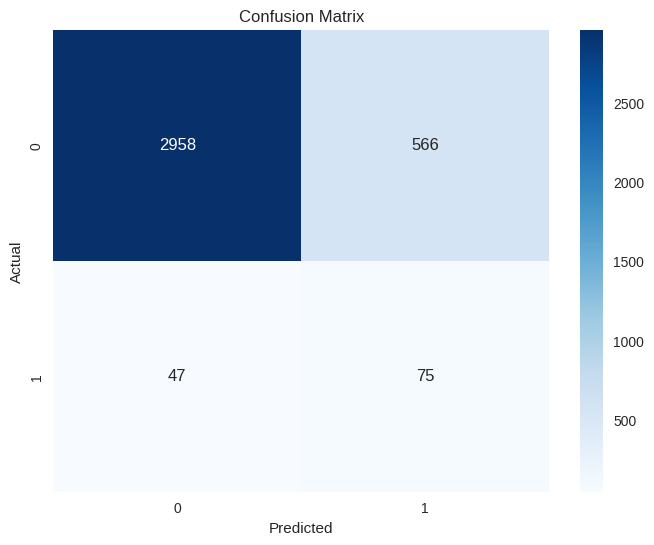

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Now lets try plotting the Roc Curve and AUC

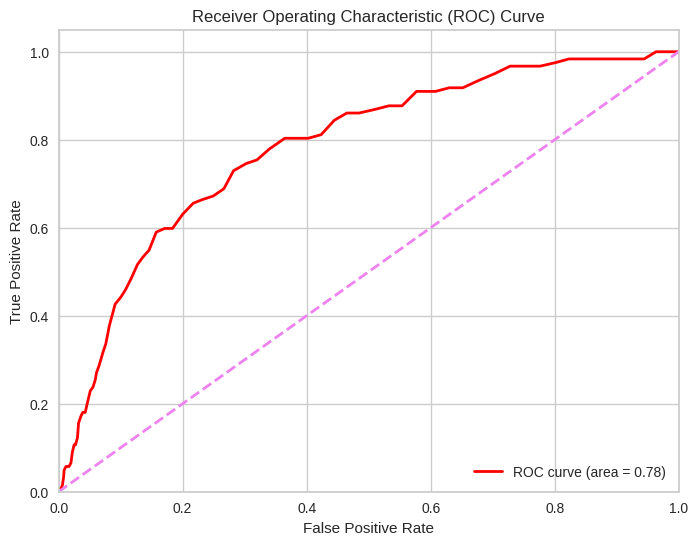

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model1.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We have generated a Receiver Operating Characteristic (ROC) curve and calculated the Area Under the Curve (AUC) to evaluate the performance of our model. With an AUC of 0.78, our model demonstrates reasonable discriminative ability in distinguishing between positive and negative instances. The higher the AUC value (closer to 1), the better the model's ability to correctly classify instances. Overall, an AUC of 0.78 suggests that our model performs reasonably well in predicting sepsis, indicating promising predictive capability.

# FEATURE IMPORTANCE

To calculate feature importance we used Feature Importance Scores. These scores are computed based on how frequently a feature is used to split the data and how much it reduces impurity using the Gini index.

SHAP (SHapley Additive exPlanations) and Lasso methods were also included to gain  more insights into the patterns governing the model’s prediction process.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

models = {
    "Random Forest": RandomForestClassifier(),
}

feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances[name] = np.abs(model.coef_[0])
    else:
        feature_importances[name] = np.nan

feature_importance_df = pd.DataFrame(feature_importances, index=X_train.columns)

feature_importance_df = feature_importance_df.apply(pd.to_numeric)

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importance = np.abs(model.coef_[0])
    else:
        feature_importance = None

    if feature_importance is not None:
        # Visualize feature importance for each model
        sorted_idx = np.argsort(feature_importance)[::-1]
        features = X_train.columns[sorted_idx]
        feature_importance = feature_importance[sorted_idx]
        fig = px.bar(x=features[:10], y=feature_importance[:10], labels={'x': 'Features', 'y': 'Feature Importance'})
        fig.update_traces(marker_color='lightblue')
        fig.update_layout(title=f'Top 10 Feature Importance for {name}')
        fig.show()


Shapley values measure the marginal contribution of each feature to the prediction outcome by considering all possible combinations of features. Each point on the chart is one SHAP value for a prediction and feature. The red color means higher value of a feature. For example, it can be observed that an increase in the number of hours hospitalized in the Intensive Care Unit (ICULOS) is associated with a higher probability of developing sepsis.

100%|===================| 3629/3646 [01:42<00:00]       

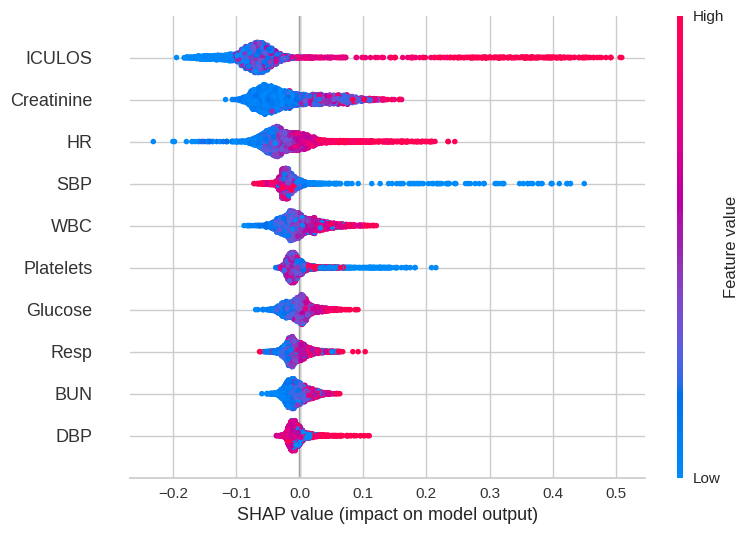

In [ ]:
import numpy as np
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_names = X_train.columns.tolist()

explainer = shap.Explainer(rf_model, X_train)

shap_values = explainer.shap_values(X_test)

abs_shap_values = np.abs(shap_values)
mean_abs_shap_values = np.mean(abs_shap_values, axis=0)

top_ten_indices = np.argsort(mean_abs_shap_values)[-10:]
top_ten_feature_names = [feature_names[i] for i in top_ten_indices]
top_ten_shap_values = shap_values[:, top_ten_indices]

shap.summary_plot(top_ten_shap_values, X_test.iloc[:, top_ten_indices], feature_names=top_ten_feature_names)


Lasso effectively performs feature selection by shrinking less important features' coefficients to zero.

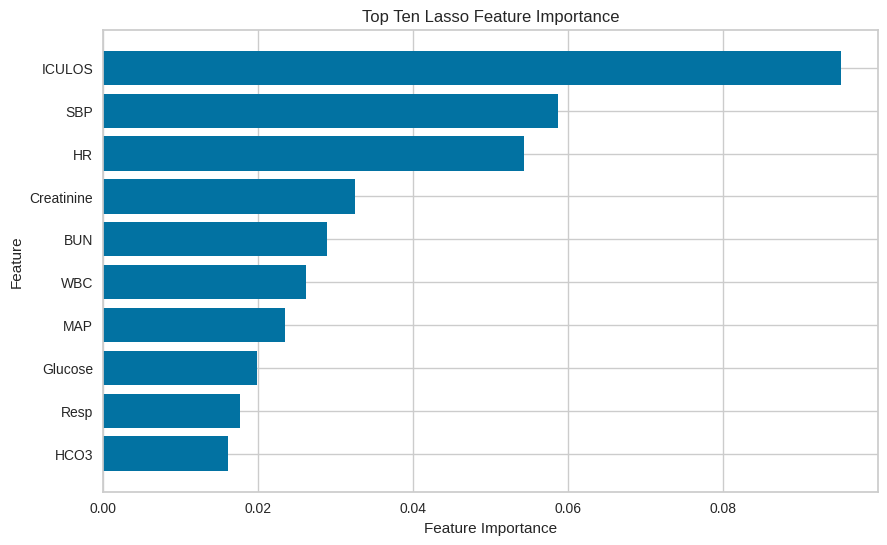

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

feature_importances = np.abs(lasso_model.coef_)
sorted_indices = np.argsort(feature_importances)

top_ten_indices = sorted_indices[-10:]

top_ten_feature_importances = feature_importances[top_ten_indices]
top_ten_feature_names = [feature_names[i] for i in top_ten_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_ten_feature_names, top_ten_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Ten Lasso Feature Importance')
plt.show()


The length of stay in the ICU is the most important feature for the three methods. This is reasonable because a longer stay in the ICU could mean they have an immunocompromising condition, making them more vulnerable to infections. Furthermore, it would give more time for infections to develop if they are having invasive medical procedures done.

There are some features of importance that agree with expectations for a sepsis condition, including an elevated heart rate, higher white blood cell count, and  lower Systolic Blood Pressure.

# CONCLUSION

In conclusion, sepsis remains a significant challenge in healthcare, and early detection and intervention are crucial in managing it effectively. Our machine learning project aims to develop predictive algorithms for sepsis detection by leveraging clinical data and advanced computational techniques. The analysis revealed missing values and class imbalance in our dataset, highlighting the importance of rigorous data cleaning and appropriate sampling techniques. Addressing these challenges will be crucial to ensure the accuracy and reliability of our predictive model, and ultimately improve patient outcomes in clinical settings.

In order to determine the optimal model, we assessed the effectiveness of multiple classifiers, which included Logistic Regression, Decision Tree, Random Forest and XGBoost. We used various metrics, such as accuracy, precision, recall, and F1-score, to evaluate their performance. Our main priority was to ensure that we accurately predicted the development of actual sepsis cases. Therefore, Random Forest model performed better for this objective.

We also performed feature importance analysis to identify the most critical predictors for sepsis prediction. The analysis revealed that heart rate, mean arterial pressure, and respiratory rate were the most important predictors, highlighting the importance of vital signs in sepsis prediction.


#References


Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.
  
Reyna, M., Josef, C., Jeter, R., Shashikumar, S., Moody, B., Westover, M. B., Sharma, A., Nemati, S., & Clifford, G. D. (2019). Early Prediction of Sepsis from Clinical Data: The PhysioNet/Computing in Cardiology Challenge 2019 (version 1.0.0). PhysioNet. https://doi.org/10.13026/v64v-d857.

Reyna MA, Josef CS, Jeter R, Shashikumar SP, Westover MB, Nemati S, Clifford GD, Sharma A. Early Prediction of Sepsis From Clinical Data: The PhysioNet/Computing in Cardiology Challenge. Critical Care Medicine 48 2: 210-217 (2019). https://doi.org/10.1097/CCM.0000000000004145


World Health Organization. (n.d.). Sepsis. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/sepsis